# Analysing IPL 2022 Data

This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/aravindas01/ipl-2022dataset).
Our aim here is to perform data analysis of the IPL 2022 Group Stage using Python.
Let's Go..

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Book_ipl22_ver_26.csv')
df = df.dropna()

### Let's plot average first and second innings scores for each venue

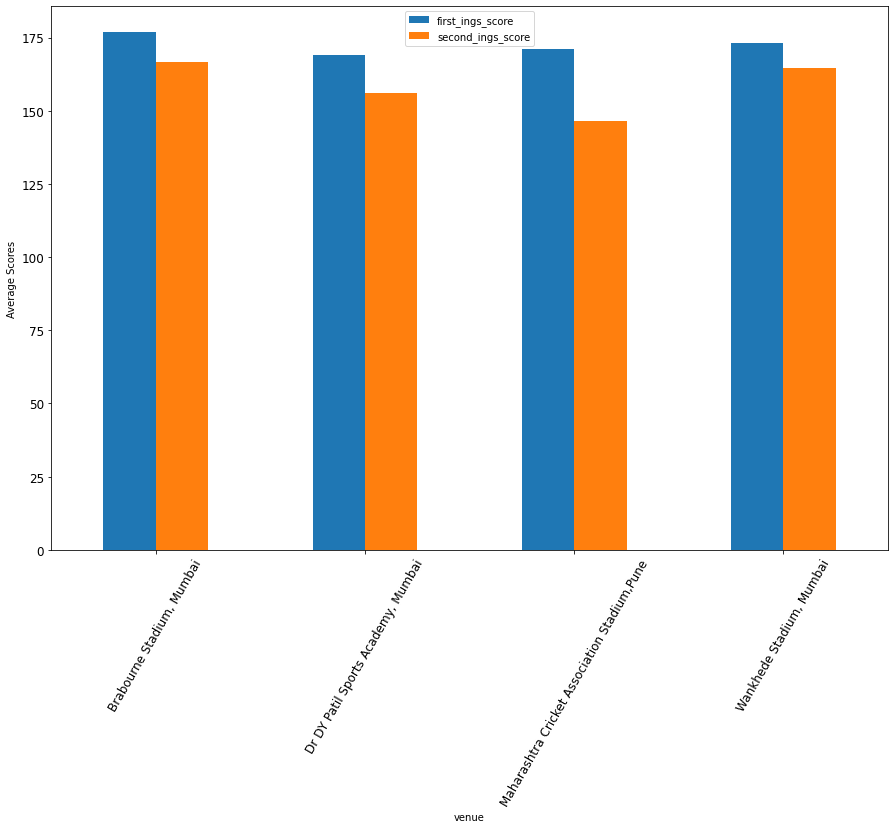

In [98]:
venues_unique = list(df.venue.unique())
avg_first_inn_score_venue = df.groupby('venue')['first_ings_score'].mean()
avg_second_inn_score_venue = df.groupby('venue')['second_ings_score'].mean()

df2 = pd.concat([avg_first_inn_score_venue, avg_second_inn_score_venue], axis = 1)
ax = df2.plot.bar(ylabel='Average Scores', rot=60, figsize=(15, 10), fontsize=12)

### Let's try and find out which player has won the most Player of the Match Awards

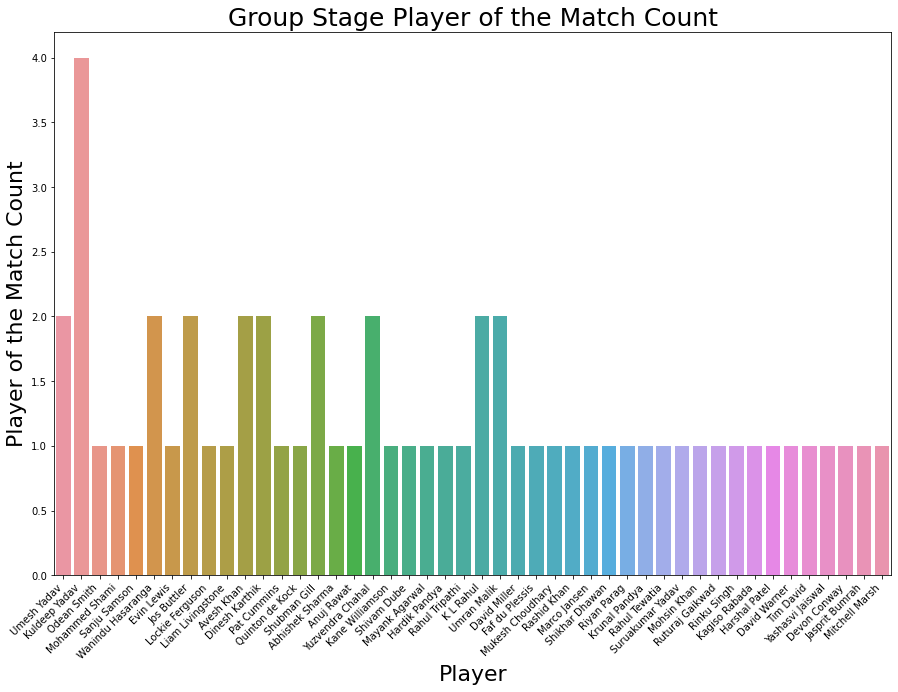

In [97]:
plt.figure(figsize=(15,10))
chart = sns.countplot(x="player_of_the_match", data=df)
chart.set_title("Group Stage Player of the Match Count", fontsize=25)
chart.set_xlabel("Player", fontsize=22)
chart.set_ylabel("Player of the Match Count", fontsize=22)
chart.tick_params(labelsize=10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

We can see that it is **Kuldeep Yadav** with the most number of Player of the Match awards at **4**.

### Is batting first decisive in winning matches? Let's find out..

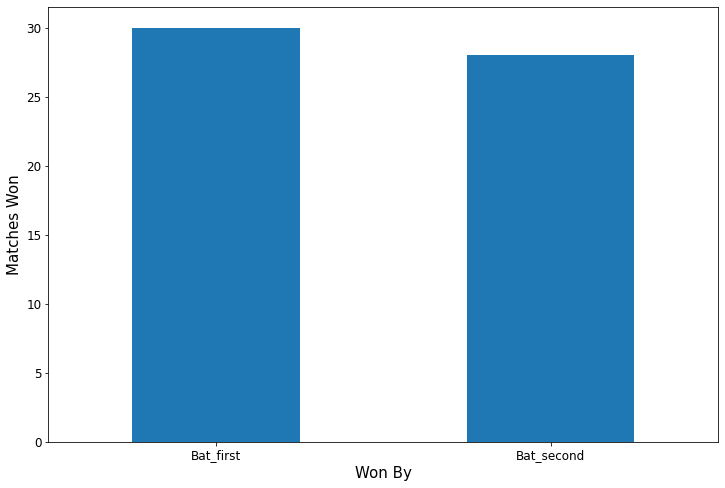

In [105]:
# Number of matches won by teams batting first and second respectively
won_by_calc = df.pivot_table(index = ['won_by'], aggfunc = 'size')
index_new = ['Bat_first', 'Bat_second']
won_by_calc.index = index_new
won_by_calc.plot.bar(xlabel= 'Won By', ylabel= 'Matches Won', figsize=(12, 8), fontsize=12, rot = 0)
plt.xlabel('Won By', fontsize=15)
plt.ylabel('Matches Won', fontsize=15)
plt.show()

We see that matches won by teams batting first or second are comparable, and thus not really a decisive factor in winning. 

### Let's look at the distributions of the highest individual scores and team totals across venues.

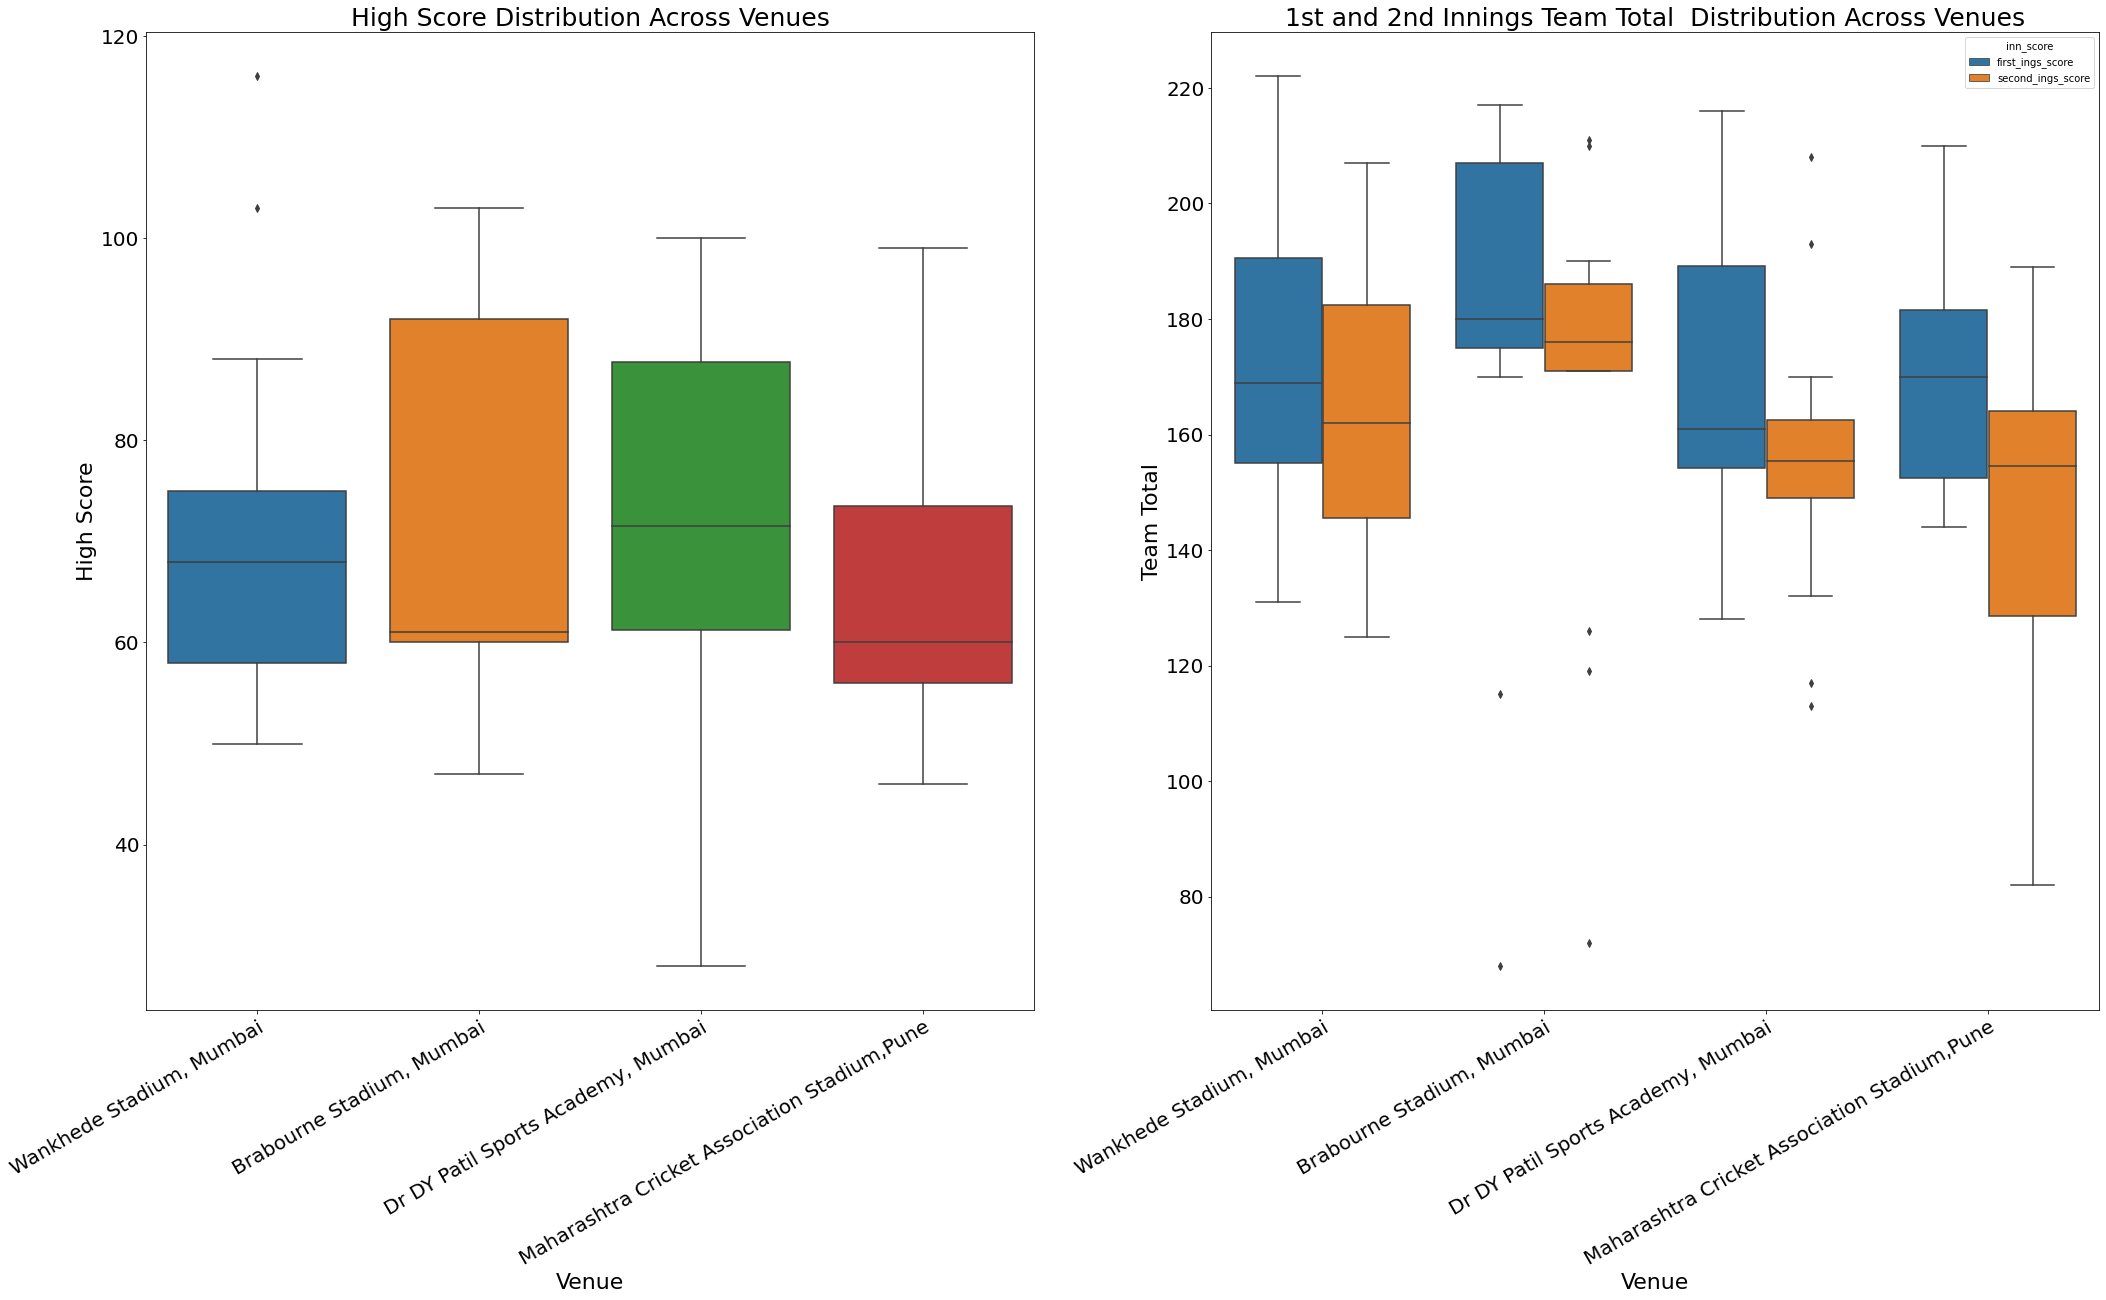

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(35, 18))
#Plot No.1 is to show the high score distribution
sns.boxplot(x="venue", y="highscore",data=df, ax=ax[0],)
ax[0].set_title("High Score Distribution Across Venues", fontsize=25)
ax[0].set_xlabel("Venue", fontsize=22)
ax[0].set_ylabel("High Score", fontsize=22)
ax[0].tick_params(labelsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')

#Plot No.2 is to show the Team Totals distribution 
df_calc = df[['venue', 'first_ings_score', 'second_ings_score']]
df_dis = df_calc.melt(id_vars=['venue'], var_name='inn_score', value_name='values')
sns.boxplot(x='venue', y='values', hue='inn_score' , data=df_dis, ax=ax[1],)
ax[1].set_title("1st and 2nd Innings Team Total  Distribution Across Venues", fontsize=25)
ax[1].set_xlabel("Venue", fontsize=22)
ax[1].set_ylabel("Team Total", fontsize=22)
ax[1].tick_params(labelsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
plt.show()

## Summary
We have performed a number of useful analysis on IPL 2022 Groups Stage using Python. Whether it is to find out which player has has the best tournament so far, or variability with respect to the venue for the team scores, the impact of batting first or second, we have been able to reach better understanding of all this through data analysis with the help of different Python libraries.